In [ ]:
!pip install pandas-profiling==2.9.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import matplotlib.dates as md

In [ ]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

In [ ]:
data.info()

In [ ]:
data.head()


In [ ]:
data.country_region.unique()

In [ ]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country","state","city","date","retail","grocery","parks","transit","workplaces","residential"]
data_br.date = pd.to_datetime(data_br.date)
data_br.index = data_br.date
data_br.drop(labels="date",axis=1,inplace=True) 
data_br

In [ ]:
data_br.info()

In [ ]:
cities = data_br.city.unique()
for i in range(len(cities)):
  print(cities[i])

In [ ]:
data_br.city = data_br.city.str.replace("Brasiléia","Brasília")
data_br_capital = data_br.loc[(data_br.city == "Rio Branco") | (data_br.city == "Maceió")
| (data_br.city == "Macapá") | (data_br.city == "Manaus") | (data_br.city == "Salvador")
| (data_br.city == "Fortaleza") | (data_br.city == "Brasília") | (data_br.city == "Vitória")
| (data_br.city == "Goiânia") | (data_br.city == "São Luís") | (data_br.city == "Cuiabá")
| (data_br.city == "Campo Grande") | (data_br.city == "Belo Horizonte") | (data_br.city == "Belém")
| (data_br.city == "João Pessoa") | (data_br.city == "Curitiba") | (data_br.city == "Recife")
| (data_br.city == "Teresina") | (data_br.city == "Rio de Janeiro") | (data_br.city == "Natal")
| (data_br.city == "Porto Alegre") | (data_br.city == "Porto Velho") | (data_br.city == "Boa Vista")
| (data_br.city == "Florianópolis") | (data_br.city == "São Paulo") | (data_br.city == "Aracaju")
| (data_br.city == "Palmas"), :]

In [ ]:
data_br_capital.head()

In [ ]:
data_br_capital = data_br_capital.loc[~data_br_capital.retail.isnull()].copy()

lin, col = data_br_capital.shape
print(data_br_capital.iloc[0]["city"])
i = 0;
for i in range(lin):
  if(data_br_capital.iloc[i]["city"] == "Rio de Janeiro"):
    print(data_br_capital.iloc[i]["retail"])

In [ ]:
plt.style.use("fivethirtyeight")


2020-03-30 00:00:00
2020-03-30 00:00:00
2020-03-29 00:00:00
2020-03-27 00:00:00
2020-03-27 00:00:00


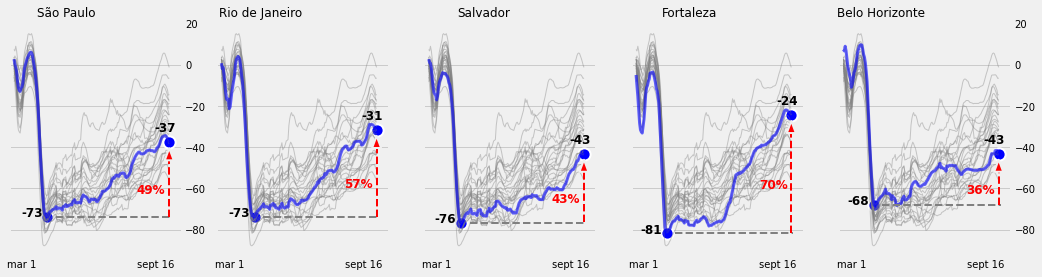

In [77]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(16,4))

item = "retail"
capital = ["São Paulo","Rio de Janeiro","Salvador","Fortaleza", "Belo Horizonte"]
for i,capital in enumerate(capital):
  data_br_capital.groupby(by=[data_br_capital.index,"city"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1, alpha=0.4, ax=ax[i])
  data_br_capital.groupby(by=[data_br_capital.index,"city"]).mean().unstack()[item][capital].rolling(window=7).mean().plot(legend=False,color="blue",linewidth=3, alpha=0.6, ax=ax[i])
  dd = data_br_capital.groupby(by=[data_br_capital.index,"city"]).mean().unstack()[item][capital].rolling(window=7).mean().copy()
  
  min = dd.iloc[6]
  last = dd.iloc[dd.count()+5]
  index_last = dd.index[dd.count()+5]
  minX = 0
  j = 7

  for j in range(dd.count()):
    if(dd.iloc[j] < min):
      minX = j+1
      min = dd.iloc[j]
      index = dd.index[j]
      positionValue = dd.index[j-30]
  print(index)

  ax[i].set_title(capital,fontsize=12,ha='right')
  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")
  
  ax[i].set_xticklabels(["","mar 1","","","","","sept 16"])
  ax[i].set_xlim([dd.index[0],md.datetime.timedelta(days=20) + dd.index[dd.count()-1]])
  ax[i].xaxis.set_tick_params(labelsize=10)
  ax[i].yaxis.set_tick_params(labelsize=10)

  ax[i].scatter(index, min, c="blue", s=150, edgecolors="white", lw=2)
  ax[i].scatter(index_last, last, c="blue", s=150, edgecolors="white", lw=2)

  ax[i].axhline(y=min, xmin=((minX/dd.count())+0.02), xmax=0.94, linewidth=2, c='grey', linestyle='dashed')
  
  v = abs(((abs(min)+20)/113)-1)
  f = abs(((abs(last-3)+20)/108)-1)

  ax[i].axvline(x=index_last, ymin=v, ymax=f, linewidth=2, c='red', linestyle='dashed')
  ax[i].annotate(s='', xy=(index_last, last-3), xytext=(index_last, last-5), arrowprops=dict(facecolor ='red', linewidth = 2, headwidth=9))

  
  ax[i].text(dd.index[dd.count()-12], last+5, str(int(last)) , dict(size=12), color='black', weight="bold")
  ax[i].text(positionValue, min, str(int(min)) , dict(size=12), color='black', weight="bold")

  
  v  = int(abs(((last/min)-1)*100))
  s = str(v) + '%'
  ax[i].text(dd.index[dd.count()-32], -(abs((min+last)/2) + 7), s , dict(size=12), color='red', weight="bold")



  if (i==0) or (i==4):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("capital.png",dpi=300)
plt.show()